#  NLP Project : Detecting adversarial attacks

# Visualisations and comparison between RDE and MLE

In this part of the code, we implement our robust density estimation and compare it to the simple MLE estimator. We provide some informative visualisations of the densities to show how it differs and why it detects adversarial attacks the best.

# Preliminaries 

First we import our packages.

In [3]:
!pip install matplotlib
!pip install numpy
!pip install sklearn
!pip install scipy
!pip install tensorflow
!pip install pandas
!pip install datasets
!pip install evaluate
!pip install torch
!pip install scienceplots

#general 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

#for models
import tensorflow as tf
!pip install transformers
import transformers as tr
import datasets as dt
!pip install sentence_transformers
import sklearn.covariance as Covariance
import sklearn.decomposition as Decomposition
from sentence_transformers import SentenceTransformer
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
from tqdm.auto import tqdm
import evaluate as ev


#for attacks
#!pip install textattack[tensorflow] 
#from textattack import Attack
#from textattack.constraints.grammaticality import PartOfSpeech
#from textattack.constraints.pre_transformation import (
#    InputColumnModification,
#    RepeatModification,
#    StopwordModification,
#)
#from textattack.constraints.semantics import WordEmbeddingDistance
#from textattack.constraints.semantics.sentence_encoders import UniversalSentenceEncoder
#from textattack.goal_functions import UntargetedClassification
#from textattack.search_methods import GreedyWordSwapWIR
#from textattack.transformations import WordSwapEmbedding
#from textattack.attack_recipes import AttackRecipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 4.0 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 10.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 9.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.4 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 8.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 6.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 4.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━

2023-03-20 16:27:00.028038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 16:27:00.945320: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-20 16:27:00.945403: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-20 16:27:00.945410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 26.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 30.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=c7f23bb92d0afe2468425cc519c2ef4f926c71e15a8eb3fe91528c354e4bc638
  Stored in directory: /home/onyxia/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


We import our dataset. This is directly the dataset of the authors of the article "Detecting adversarial examples".

In [4]:
imdb_dataset = pd.read_csv("bert-base-uncased-imdb_bae.csv")

# Parametric density estimation

Now we will code the parametric density estimation, with methods making it more robust.

## Preprocessing


First, the dataset is already quite clean, so there is very little preprocessing to do. We simply need to remove brackets in the text, and then we get the embeddings.

In [5]:
#to remove brackets 
imdb_sentences = imdb_dataset["original_text"].apply(lambda x : x.replace("[","").replace("]",""))

#to get the embeddings
BERT_transformer = SentenceTransformer('textattack/bert-base-uncased-imdb')

IMDB_embeddings = BERT_transformer.encode(imdb_sentences)

No sentence-transformers model found with name /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Robust density estimation method

The method of robust density estimation described in the article consists in two steps : kernel PCA and Minimum Covariance Determinant.

**kernel PCA**

In [6]:
#Instantiate and use Kernel PCA : 
PCA_kernel = Decomposition.KernelPCA(n_components = 100, kernel = "rbf")
embeddings_PCA = PCA_kernel.fit_transform(IMDB_embeddings)

#interlude : separation of class 0 and 1 : 
class_1_IMDB = embeddings_PCA[imdb_dataset["ground_truth_output"] == 1]
class_0_IMDB = embeddings_PCA[imdb_dataset["ground_truth_output"] == 0]
#Now the MLE estimation after PCA : 
MLE_mean1 = np.sum(class_1_IMDB, axis=0)/np.shape(class_0_IMDB)[0]
MLE_mean0 = np.sum(class_0_IMDB, axis=0)/np.shape(class_0_IMDB)[0]

#For covariance we make a loop :
MLE_cov1 = np.zeros((MLE_mean1.shape[0],MLE_mean1.shape[0])) 
MLE_cov0 = np.zeros((MLE_mean0.shape[0],MLE_mean0.shape[0])) 
for line in class_1_IMDB : 
    MLE_cov1 = MLE_cov1 + np.reshape(line,(line.shape[0],1))@np.reshape(line,(1,line.shape[0]))

for line in class_0_IMDB : 
    MLE_cov0 = MLE_cov0 + np.reshape(line,(line.shape[0],1))@np.reshape(line,(1,line.shape[0]))

**Minimum Covariance Determinant**

In [7]:
#Now we can add the MCD :
MCD_cov1 = Covariance.MinCovDet()
MCD_cov1.fit(embeddings_PCA[imdb_dataset["ground_truth_output"] == 1])

RDE_mean1 = MCD_cov1.location_
RDE_cov1 = MCD_cov1.covariance_

MCD_cov0 = Covariance.MinCovDet()
MCD_cov0.fit(embeddings_PCA[imdb_dataset["ground_truth_output"] == 0])

RDE_mean0 = MCD_cov0.location_
RDE_cov0 = MCD_cov0.covariance_

Now, we can have some visualisation for these freshly estimated density, with the maximum likelihood estimator. We will compare what the simple MLE gives, with the robust density estimation method.

First, we visualise simply with the MLE.

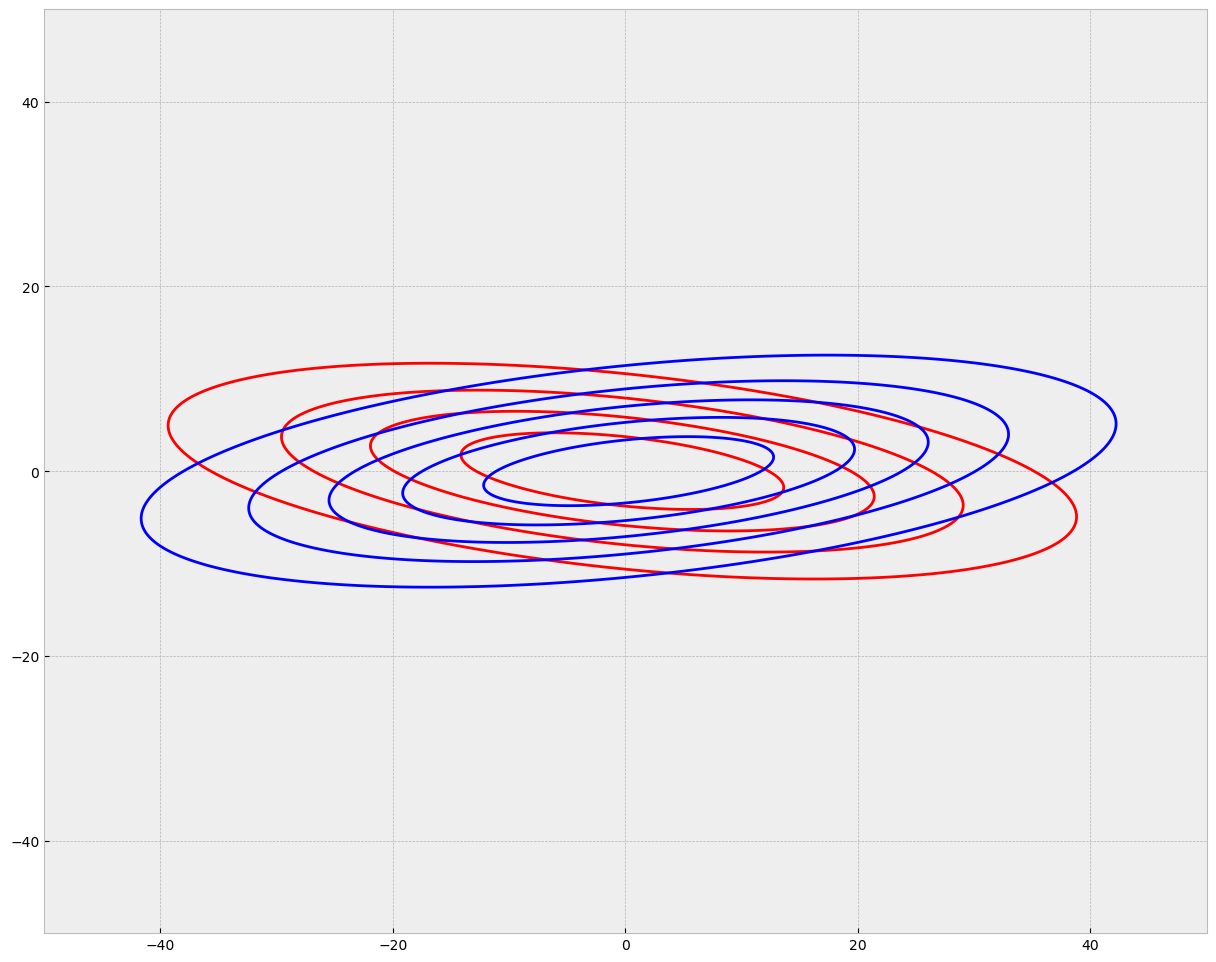

In [8]:
#To have the value of 2d multivariate at different point (made to be used with np.meshgrid) 
normal_density_1 = multivariate_normal(MLE_mean1[0:2], MLE_cov1[0:2,0:2])
normal_density_0 = multivariate_normal(MLE_mean0[0:2], MLE_cov0[0:2,0:2])

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

abscisse, ordonnee = np.meshgrid(np.linspace(-100, 100, 1000), np.linspace(-100, 100, 1000))
level = np.dstack((abscisse, ordonnee))

ax.contour(abscisse, ordonnee, normal_density_1.pdf(level), 20, levels = 5, colors = "red")
ax.contour(abscisse, ordonnee, normal_density_0.pdf(level), 20, levels = 5, colors = "blue")

ax.set_xlim((-50,50))
ax.set_ylim((-50,50))

plt.savefig("Normal_multivariate_distribution_MLE")

plt.show()

Now, with our RDE method, we have an improvement.

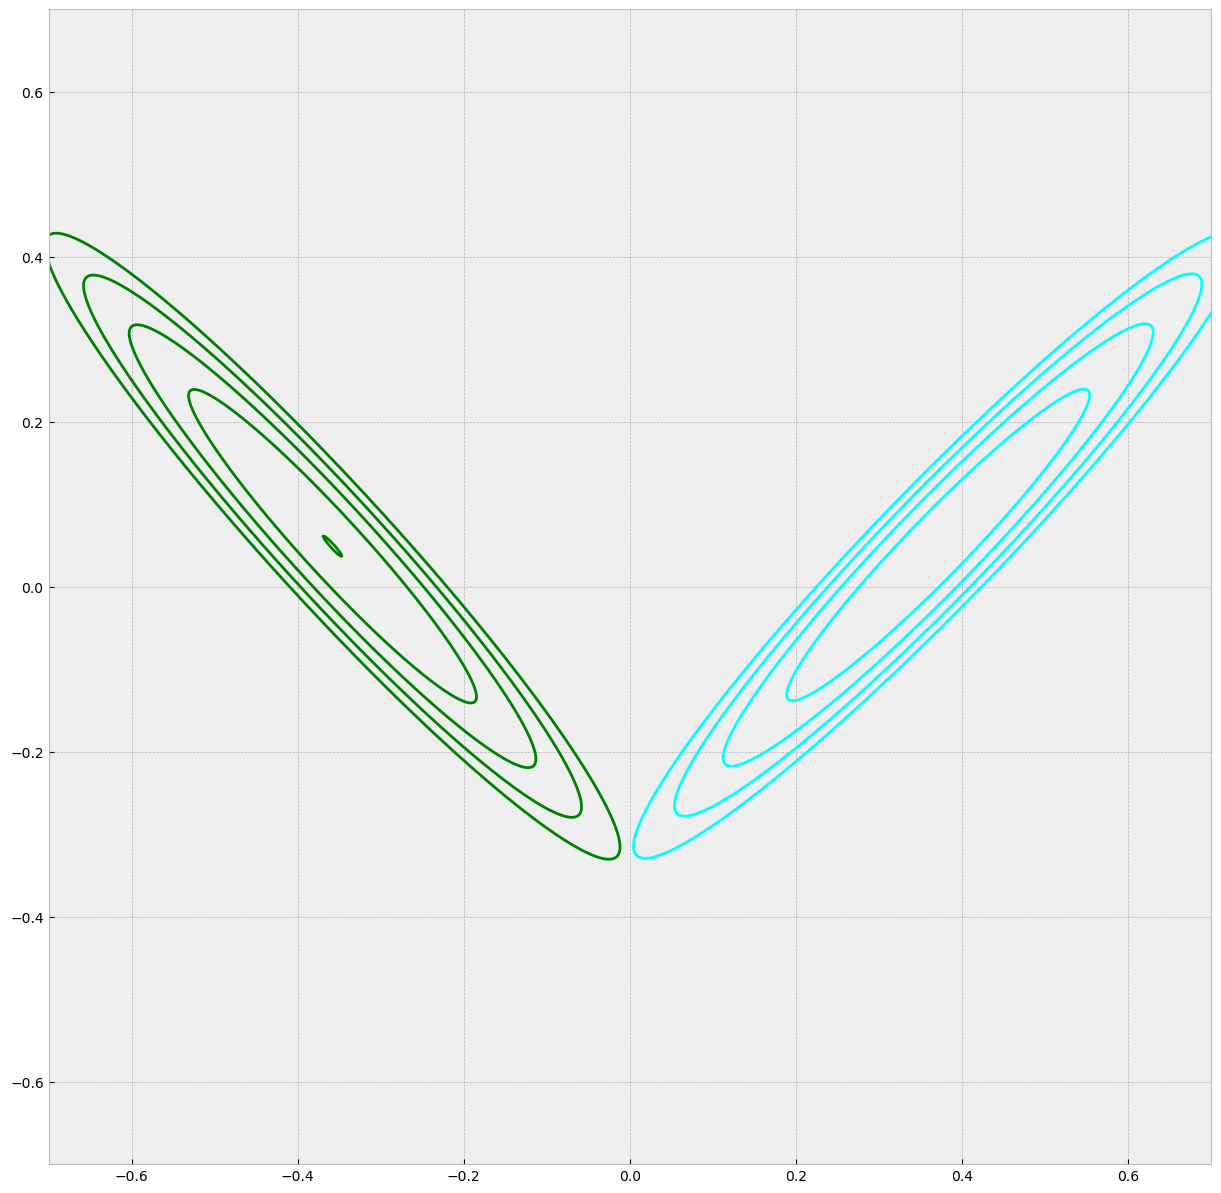

In [9]:
#To have the value of 2d multivariate at different point (made to be used with np.meshgrid) 
normal_density_1 = multivariate_normal(RDE_mean1[0:2], RDE_cov1[0:2,0:2])
normal_density_0 = multivariate_normal(RDE_mean0[0:2], RDE_cov0[0:2,0:2])

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 15))

abscisse, ordonnee = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
level = np.dstack((abscisse, ordonnee))

ax.contour(abscisse, ordonnee, normal_density_1.pdf(level), 20, levels = np.logspace(-3, 2, 5), colors = "green")
ax.contour(abscisse, ordonnee, normal_density_0.pdf(level), 20, levels = np.logspace(-3, 2, 5), colors = "cyan")

ax.set_xlim((-0.7,0.7))
ax.set_ylim((-0.7,0.7))

plt.savefig("Normal_multivariate_distribution_RDE")

plt.show()

Now we look at these on the same graph.


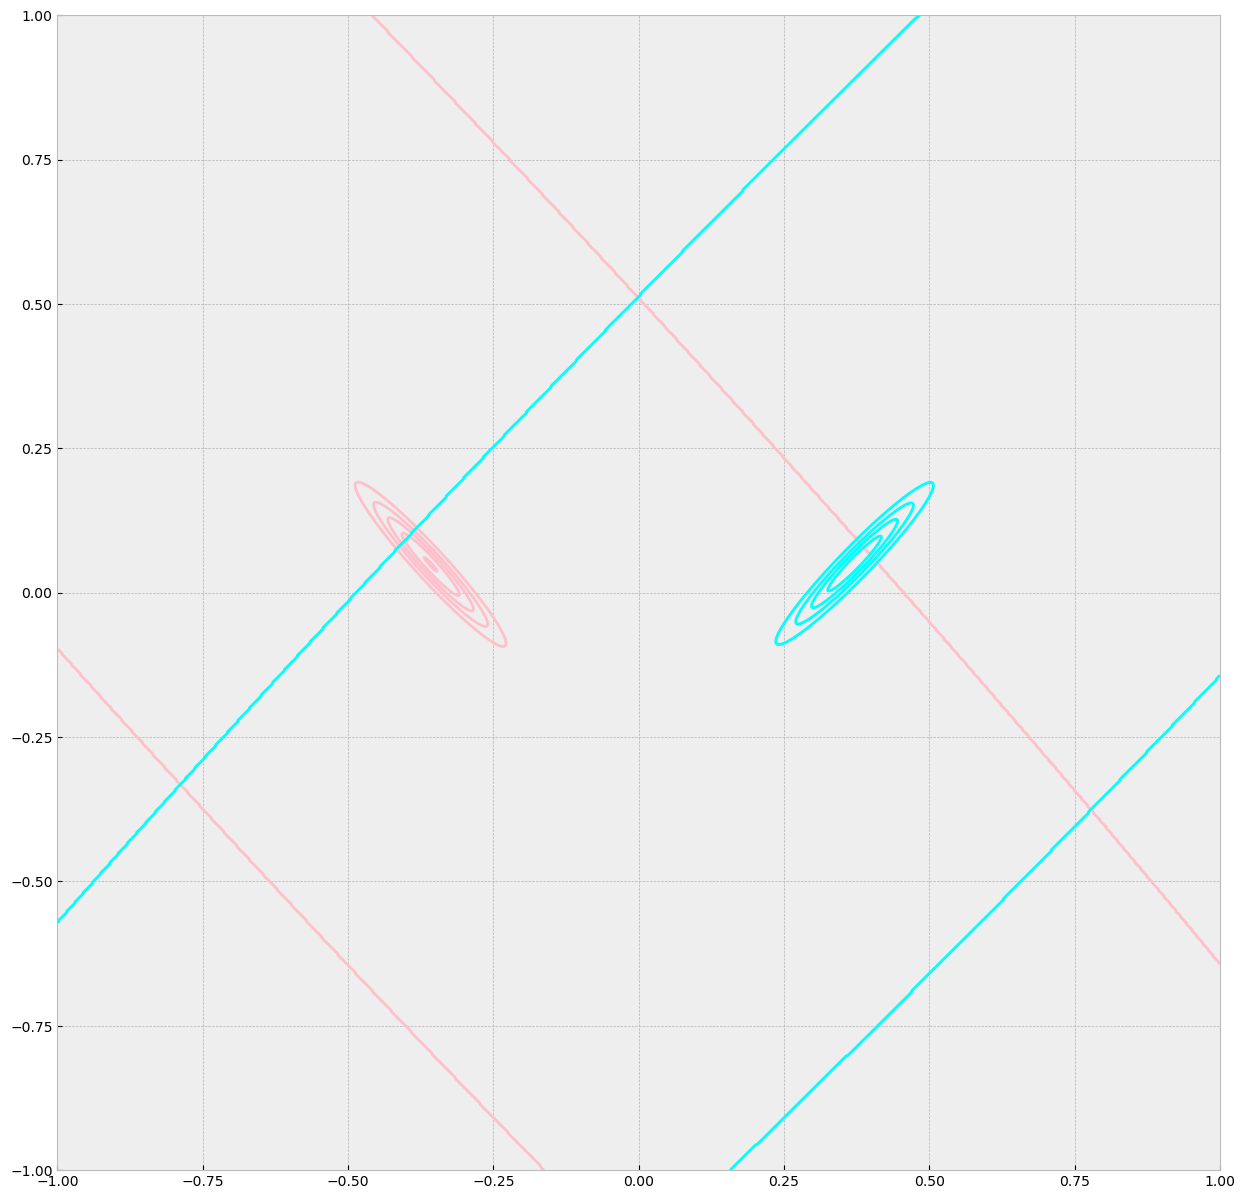

In [14]:
#To have the value of 2d multivariate at different point (made to be used with np.meshgrid) 
normal_density_1 = multivariate_normal(MLE_mean1[0:2], MLE_cov1[0:2,0:2])
normal_density_0 = multivariate_normal(MLE_mean0[0:2], MLE_cov0[0:2,0:2])

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 15))

abscisse, ordonnee = np.meshgrid(np.linspace(-100, 100, 1000), np.linspace(-100, 100, 1000))
level = np.dstack((abscisse, ordonnee))

ax.contour(abscisse, ordonnee, normal_density_1.pdf(level), 20, levels = 5, colors = "red")
ax.contour(abscisse, ordonnee, normal_density_0.pdf(level), 20, levels = 5, colors = "blue")

normal_density_1 = multivariate_normal(RDE_mean1[0:2], RDE_cov1[0:2,0:2])
normal_density_0 = multivariate_normal(RDE_mean0[0:2], RDE_cov0[0:2,0:2])

abscisse, ordonnee = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
level = np.dstack((abscisse, ordonnee))

ax.contour(abscisse, ordonnee, normal_density_1.pdf(level), 20, levels = 5, colors = "pink")
ax.contour(abscisse, ordonnee, normal_density_0.pdf(level), 20, levels = 5, colors = "cyan")

ax.set_xlim((-1,1))
ax.set_ylim((-1,1))

plt.savefig("Normal_multivariate_distribution_MLE_and_RDE")

plt.show()

Then, we visualise the density for different points, comparing again the MLE and the RDE estimators.


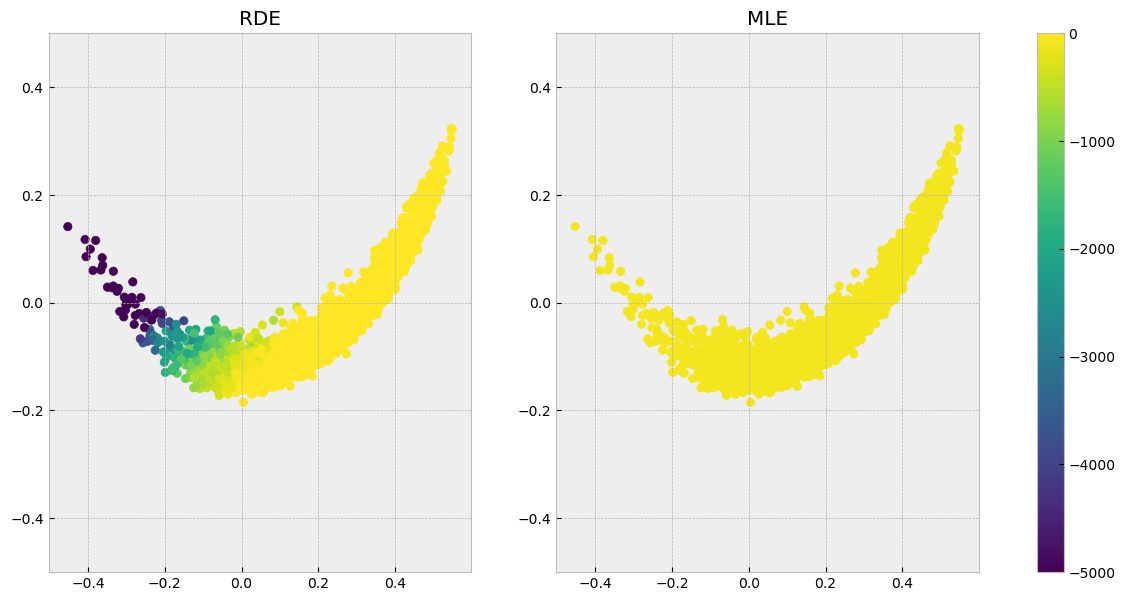

In [15]:
#To have the value of 2d multivariate at different point :
normal_density_RDE = multivariate_normal(RDE_mean0, RDE_cov0)
normal_density_MLE = multivariate_normal(RDE_mean0, MLE_cov0)

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 7))

first_scatter = ax1.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = normal_density_RDE.logpdf(class_0_IMDB), vmin=-5000, vmax=0)

ax1.set_ylim((-0.5,0.5))
ax1.set_title("RDE")

normal_density_0 = multivariate_normal(MLE_mean0, MLE_cov0)

second_scatter = ax2.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = normal_density_MLE.logpdf(class_0_IMDB), vmin=-5000, vmax=0)

ax2.set_ylim((-0.5,0.5))
ax2.set_title("MLE")

fig.colorbar(second_scatter, ax=[ax1,ax2])

plt.savefig("Comparison between MLE and RDE")

plt.show()

Now we look at the density of non-perturbed text classified as 0 versus 1.

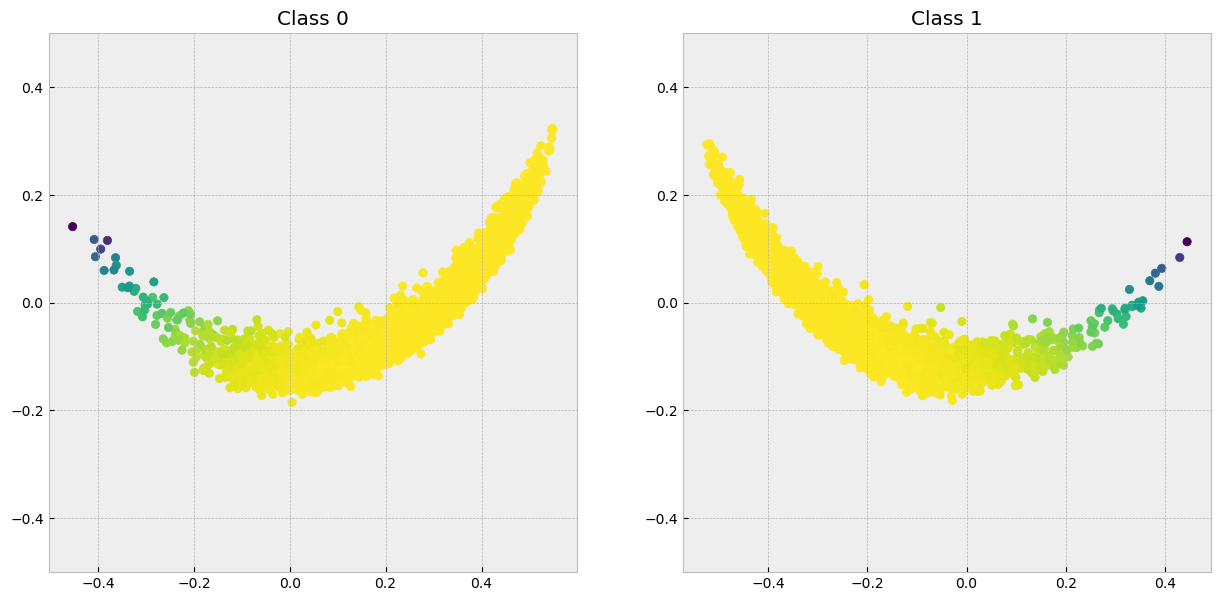

In [16]:
#To have the value of 2d multivariate at different point :
normal_density_0 = multivariate_normal(RDE_mean0, RDE_cov0)
normal_density_1 = multivariate_normal(RDE_mean1, RDE_cov1)

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = normal_density_0.logpdf(class_0_IMDB))

ax1.set_ylim((-0.5,0.5))
ax1.set_title("Class 0")

normal_density_0 = multivariate_normal(MLE_mean0, MLE_cov0)

ax2.scatter(class_1_IMDB[:,0], class_1_IMDB[:,1], c = normal_density_1.logpdf(class_1_IMDB))

ax2.set_ylim((-0.5,0.5))
ax2.set_title("Class 1")

plt.savefig("Comparison of class 0 and 1 for non perturbed text")

plt.show()

Now, we repeat this work using adversarial examples of the IMDB dataset.

In [17]:
imdb_sentences = imdb_dataset["perturbed_text"].apply(lambda x : x.replace("[","").replace("]",""))

#Let"s get the embedding : 
perturbed_IMDB_embeddings = BERT_transformer.encode(imdb_sentences)

Now we look at the density of perturbed text classified as 0 versus 1.

[-83.37636768 -83.36815028 -83.36413004 ... -83.38428899 -83.3845697
 -83.36709212]


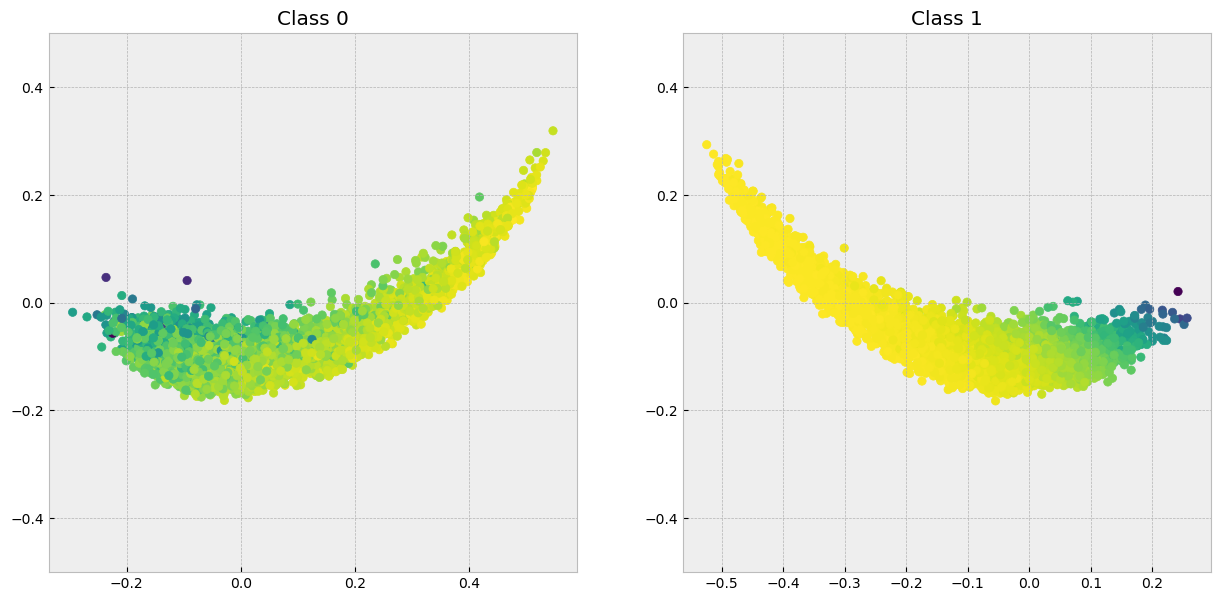

In [18]:
perturbed_0 = PCA_kernel.transform(perturbed_IMDB_embeddings[imdb_dataset["perturbed_output"] == 0])
perturbed_1 = PCA_kernel.transform(perturbed_IMDB_embeddings[imdb_dataset["perturbed_output"] == 1])

#To have the value of 2d multivariate at different point :

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.scatter(perturbed_0[:,0], perturbed_0[:,1], c = normal_density_0.logpdf(perturbed_0[:]))

print(np.log(normal_density_0.pdf(perturbed_0)))

ax1.set_ylim((-0.5,0.5))
ax1.set_title("Class 0")

normal_density_1 = multivariate_normal(RDE_mean1, RDE_cov1)

ax2.scatter(perturbed_1[:,0], perturbed_1[:,1], c = normal_density_1.logpdf(perturbed_1[:]))

ax2.set_ylim((-0.5,0.5))
ax2.set_title("Class 1")

plt.savefig("Comparison of class 0 and 1 for perturbed text")

plt.show()

We look at the density of original and avdersarial examples with the Robust Density Estimator, versus the MLE method below. We expect different outcomes in density. It shows really less difference in density.

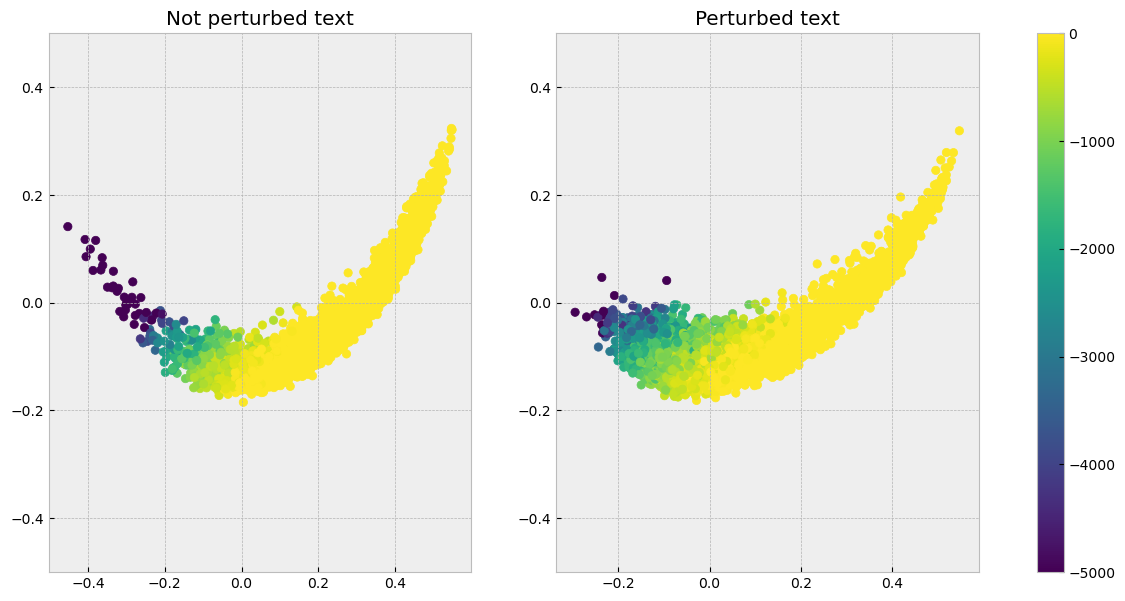

In [22]:
#To have the value of 2d multivariate at different point :
normal_density_0 = multivariate_normal(RDE_mean0, RDE_cov0)
normal_density_1 = multivariate_normal(RDE_mean1, RDE_cov1)

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 7))

first_scatter = ax1.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = normal_density_0.logpdf(class_0_IMDB), vmin=-5000, vmax=0)

ax1.set_ylim((-0.5,0.5))
ax1.set_title("Not perturbed text")

normal_density_1 = multivariate_normal(RDE_mean1, RDE_cov1)

second_scatter = ax2.scatter(perturbed_0[:,0], perturbed_0[:,1], c = normal_density_0.logpdf(perturbed_0[:]), vmin=-5000, vmax=0)

ax2.set_ylim((-0.5,0.5))
ax2.set_title("Perturbed text")

fig.colorbar(second_scatter, ax=[ax1,ax2])

plt.savefig("Comparison between perturbed and non perturbed text_RDE")

plt.show()


[-83.37636768 -83.36815028 -83.36413004 ... -83.38428899 -83.3845697
 -83.36709212]


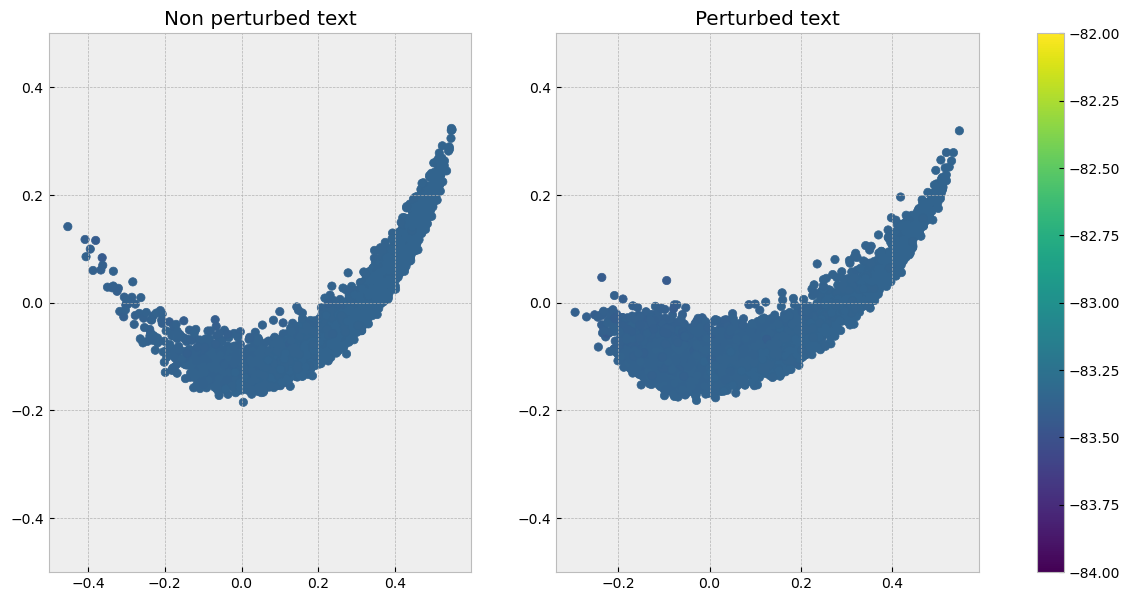

In [23]:
#To have the value of 2d multivariate at different point :
normal_density_0 = multivariate_normal(MLE_mean0, MLE_cov0)
normal_density_1 = multivariate_normal(MLE_mean1, MLE_cov1)

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = normal_density_0.logpdf(class_0_IMDB), vmin = -84, vmax = -82)

print(np.log(normal_density_0.pdf(perturbed_0)))

ax1.set_ylim((-0.5,0.5))
ax1.set_title("Non perturbed text")

normal_density_1 = multivariate_normal(RDE_mean1, RDE_cov1)

second_scatter = ax2.scatter(perturbed_0[:,0], perturbed_0[:,1], c = normal_density_0.logpdf(perturbed_0[:]),  vmin = -84, vmax = -82)

ax2.set_ylim((-0.5,0.5))
ax2.set_title("Perturbed text")

fig.colorbar(second_scatter, ax=[ax1,ax2])

plt.savefig("Comparison between perturbed and non perturbed text_MLE")

plt.show()

We compare adversarial versus original text examples in the graph below.

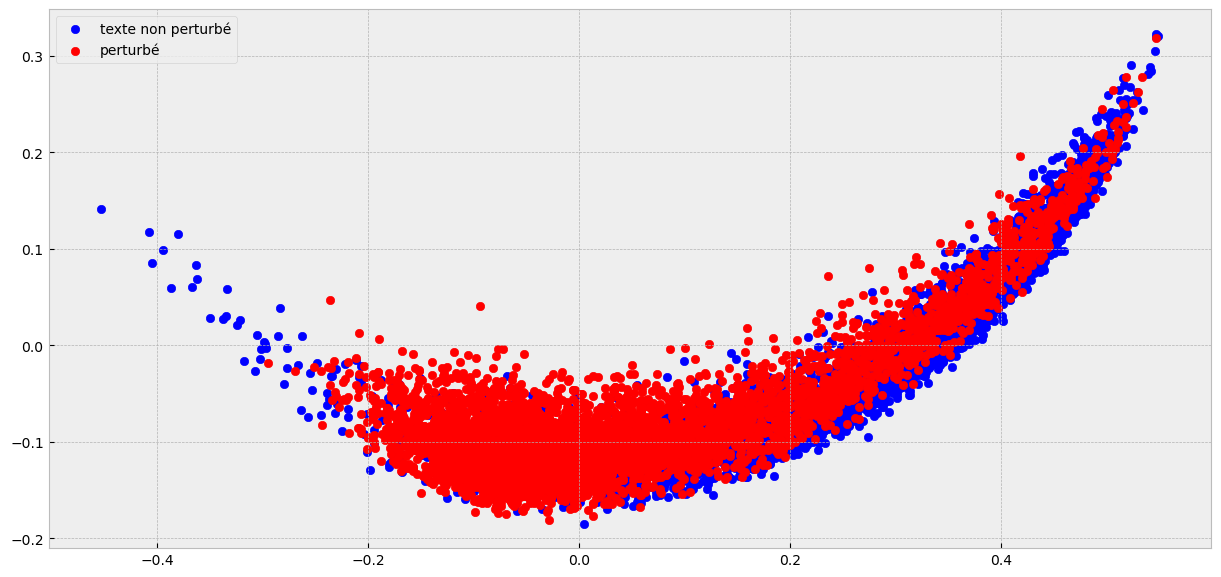

In [26]:
#To have the value of 2d multivariate at different point :
normal_density_0 = multivariate_normal(RDE_mean0, RDE_cov0)
normal_density_1 = multivariate_normal(RDE_mean1, RDE_cov1)

fig,ax = plt.subplots(figsize = (15, 7))

ax.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = "blue", label = "texte non perturbé")

ax.scatter(perturbed_0[:,0], perturbed_0[:,1], c = "red", label = "perturbé")

ax.legend()

plt.savefig("Comparison of distribution for perturbed and unpertubed text")

plt.show()

# Simple PCA

In this final part, we implement a simple PCA instead of a kernel PCA and look at the difference in accuracy we obtain.

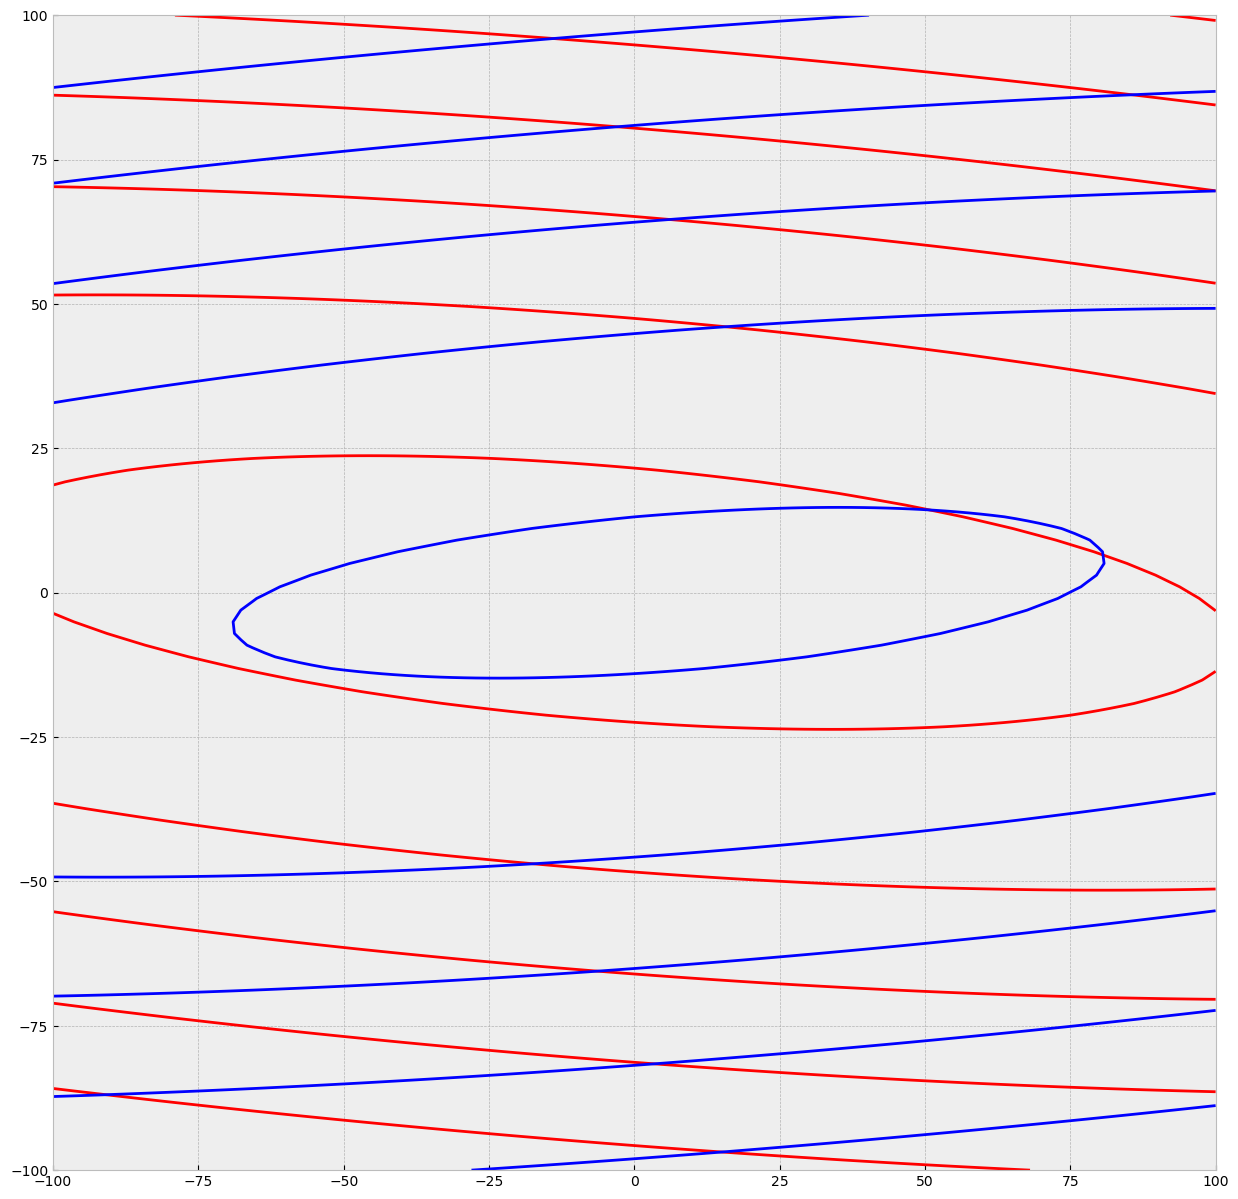

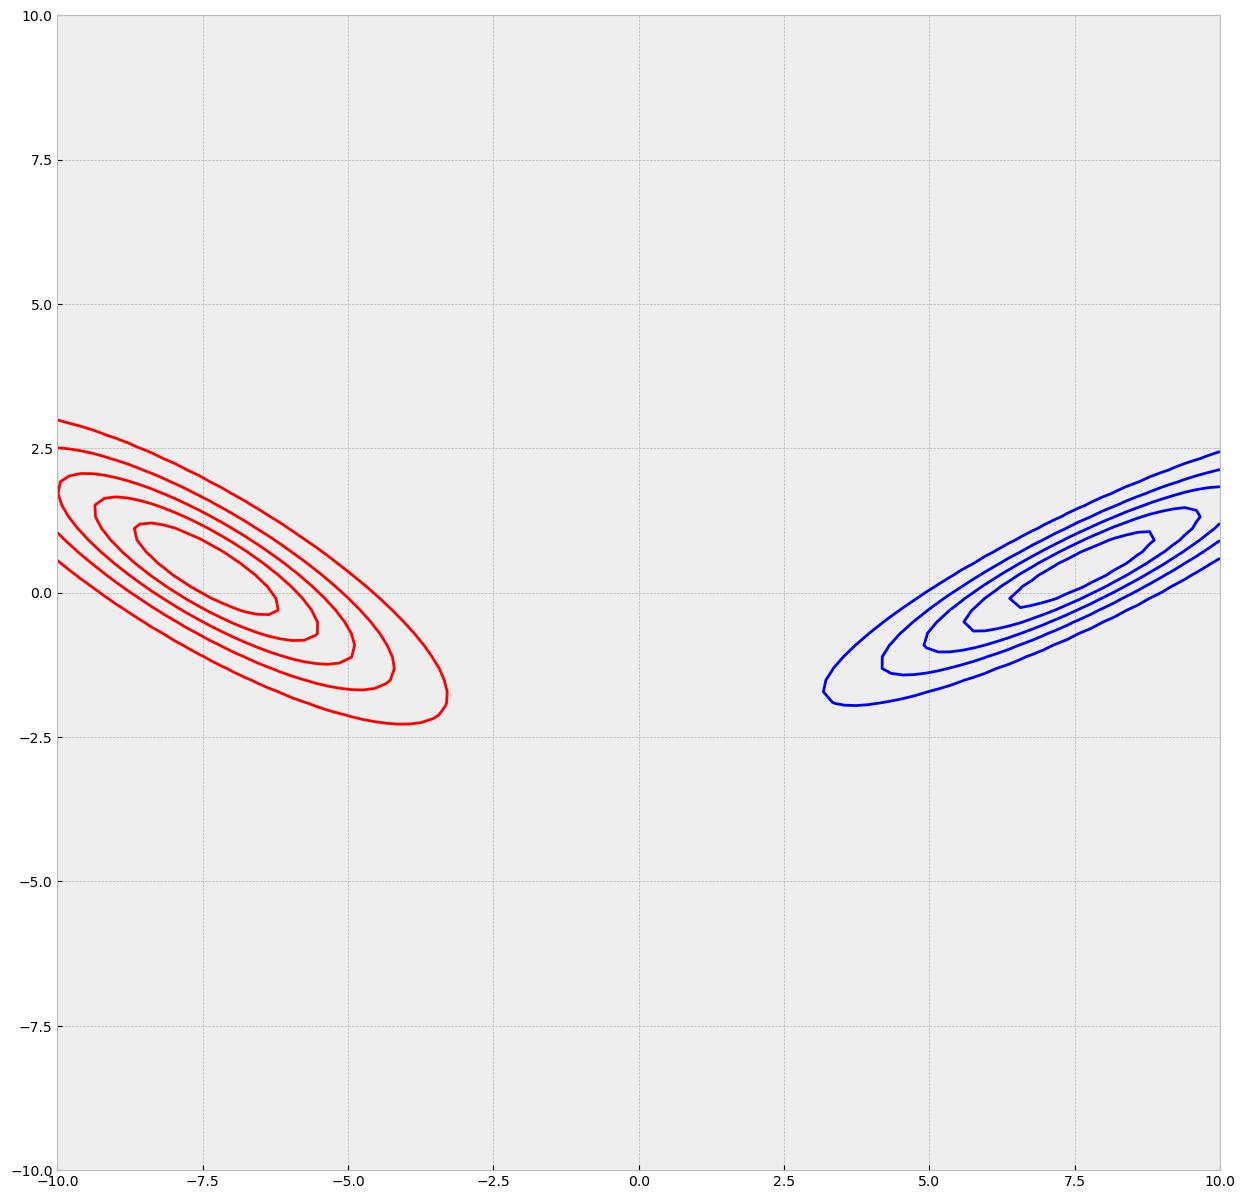

/tmp/ipykernel_337/285674887.py:79: RuntimeWarning: divide by zero encountered in log
  ax1.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = np.log(normal_density_0.pdf(class_0_IMDB)))
/tmp/ipykernel_337/285674887.py:81: RuntimeWarning: divide by zero encountered in log
  print(np.log(normal_density_0.pdf(class_0_IMDB)))


[-13.34514756  21.55609428  -6.62674167 ...  13.11039301   1.61863018
  24.25679516]


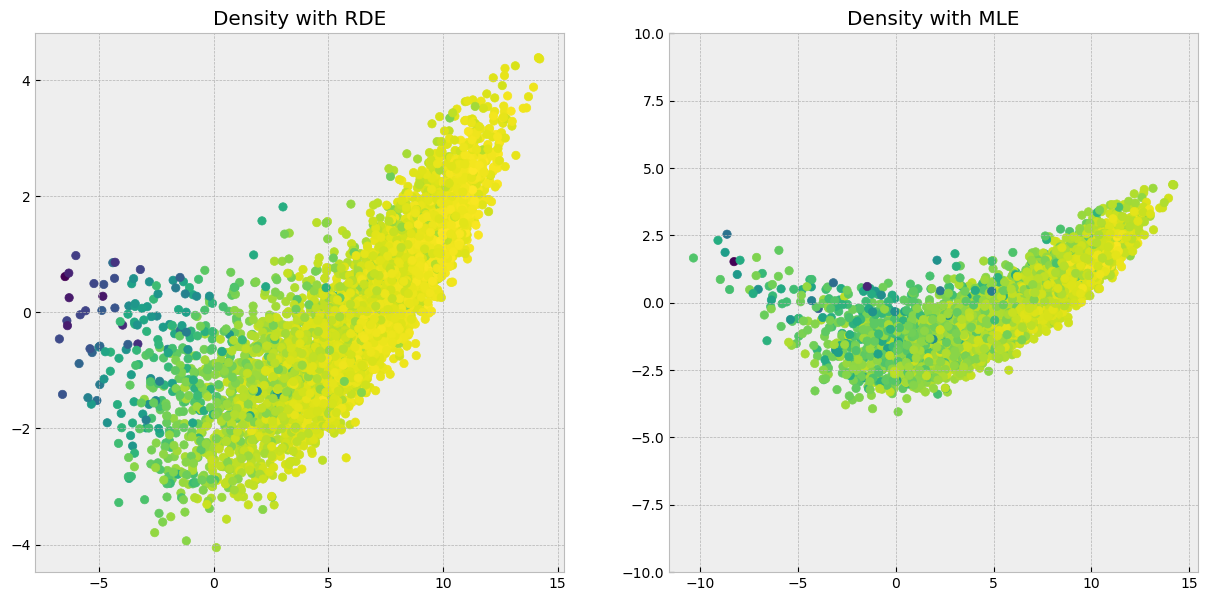

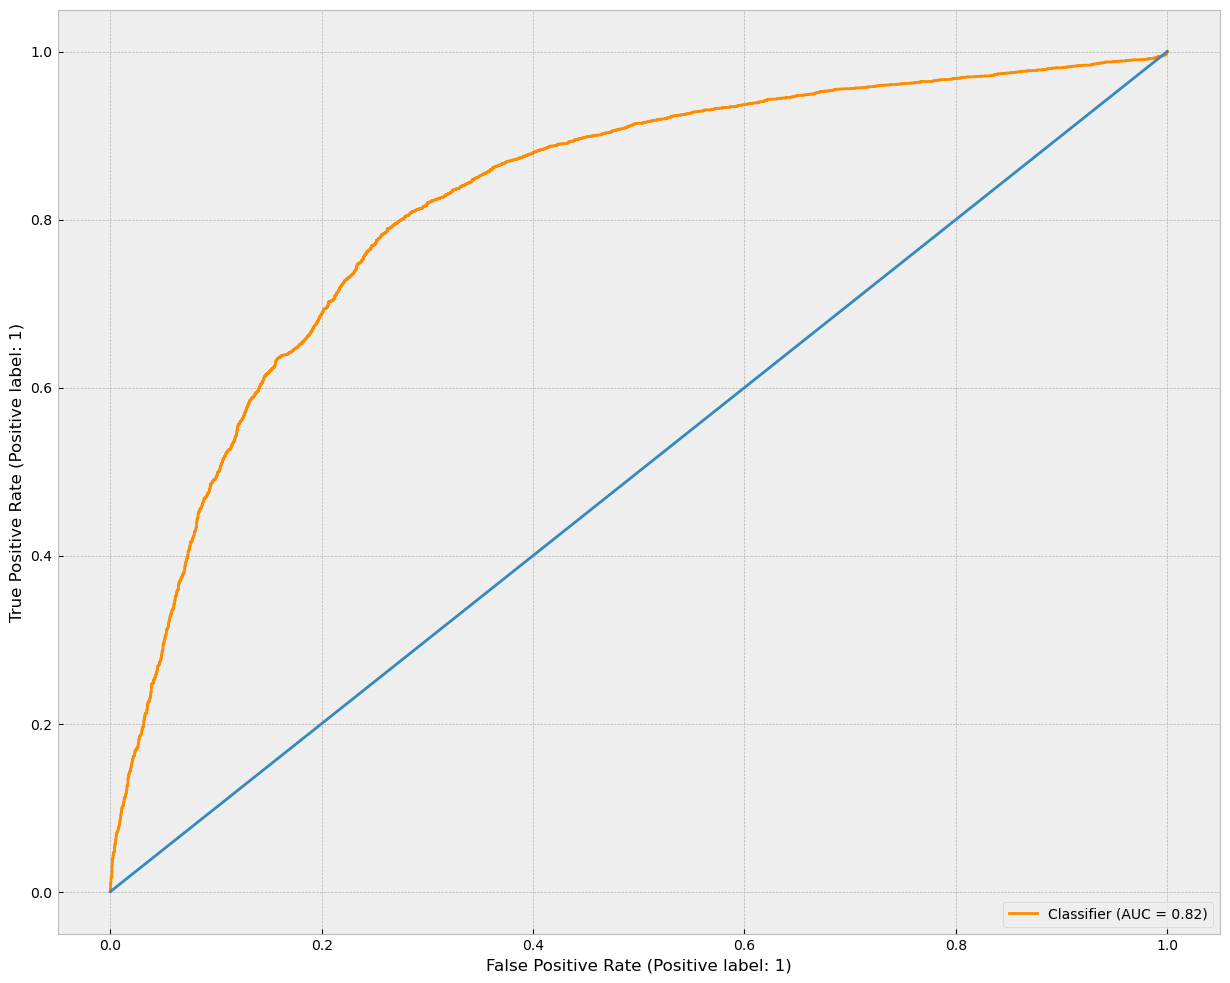

In [27]:
# What would happen if we do a simple PCA ? 
#Instantiate PCA : 
PCA = Decomposition.PCA(n_components = 100)
embeddings_PCA = PCA.fit_transform(IMDB_embeddings)

#interlude : separation of class 0 and 1 : 
class_1_IMDB = embeddings_PCA[imdb_dataset["ground_truth_output"] == 1]
class_0_IMDB = embeddings_PCA[imdb_dataset["ground_truth_output"] == 0]

#Now the MLE estimation after PCA : 
MLE_mean1 = np.sum(class_1_IMDB, axis=0)/np.shape(class_0_IMDB)[0]
MLE_mean0 = np.sum(class_0_IMDB, axis=0)/np.shape(class_0_IMDB)[0]

#For covariance we make a loop :
MLE_cov1 = np.zeros((MLE_mean1.shape[0],MLE_mean1.shape[0])) 
MLE_cov0 = np.zeros((MLE_mean0.shape[0],MLE_mean0.shape[0])) 
for line in class_1_IMDB : 
    MLE_cov1 = MLE_cov1 + np.reshape(line,(line.shape[0],1))@np.reshape(line,(1,line.shape[0]))

for line in class_0_IMDB : 
    MLE_cov0 = MLE_cov0 + np.reshape(line,(line.shape[0],1))@np.reshape(line,(1,line.shape[0]))
#Now we can add the MCD :
MCD_cov1 = Covariance.MinCovDet()
MCD_cov1.fit(embeddings_PCA[imdb_dataset["ground_truth_output"] == 1])

RDE_mean1 = MCD_cov1.location_
RDE_cov1 = MCD_cov1.covariance_

MCD_cov0 = Covariance.MinCovDet()
MCD_cov0.fit(embeddings_PCA[imdb_dataset["ground_truth_output"] == 0])

RDE_mean0 = MCD_cov0.location_
RDE_cov0 = MCD_cov0.covariance_
#Let's try to visualise the distribution, with the MLE : 

#To have the value of 2d multivariate at different point (made to be used with np.meshgrid) 
normal_density_1 = multivariate_normal(MLE_mean1[0:2], MLE_cov1[0:2,0:2])
normal_density_0 = multivariate_normal(MLE_mean0[0:2], MLE_cov0[0:2,0:2])

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 15))

abscisse, ordonnee = np.meshgrid(np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
level = np.dstack((abscisse, ordonnee))

ax.contour(abscisse, ordonnee, normal_density_1.pdf(level), 20, levels = 5, colors = "red")
ax.contour(abscisse, ordonnee, normal_density_0.pdf(level), 20, levels = 5, colors = "blue")

ax.set_xlim((-100,100))
ax.set_ylim((-100,100))

plt.show()
#Let's try to visualise the distribution, with the RDE : 

#To have the value of 2d multivariate at different point (made to be used with np.meshgrid) 
normal_density_1 = multivariate_normal(RDE_mean1[0:2], RDE_cov1[0:2,0:2])
normal_density_0 = multivariate_normal(RDE_mean0[0:2], RDE_cov0[0:2,0:2])

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 15))

abscisse, ordonnee = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
level = np.dstack((abscisse, ordonnee))

ax.contour(abscisse, ordonnee, normal_density_1.pdf(level), 20, levels = 5, colors = "red")
ax.contour(abscisse, ordonnee, normal_density_0.pdf(level), 20, levels = 5, colors = "blue")

ax.set_xlim((-10,10))
ax.set_ylim((-10,10))

plt.show()
#Let's try to visualise the value of the density for different point, with the RDE : 

#To have the value of 2d multivariate at different point :
normal_density_0 = multivariate_normal(RDE_mean0, RDE_cov0)

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = np.log(normal_density_0.pdf(class_0_IMDB)))

print(np.log(normal_density_0.pdf(class_0_IMDB)))

ax1.set_title("Density with RDE")

normal_density_0 = multivariate_normal(MLE_mean0, MLE_cov0)

ax2.scatter(class_0_IMDB[:,0], class_0_IMDB[:,1], c = np.log(normal_density_0.pdf(class_0_IMDB)))

ax2.set_ylim((-10,10))
ax2.set_title("Density with MLE")

plt.show()
#Now with the adversarial examples : 

imdb_sentences = imdb_dataset["perturbed_text"].apply(lambda x : x.replace("[","").replace("]",""))

#Let"s get the embedding : 
perturbed_IMDB_embeddings = BERT_transformer.encode(imdb_sentences)

perturbed_0 = PCA.transform(perturbed_IMDB_embeddings[imdb_dataset["perturbed_output"] == 0])
perturbed_1 = PCA.transform(perturbed_IMDB_embeddings[imdb_dataset["perturbed_output"] == 1])
#Let's see the ROC curve for the RDE estimation : 

from sklearn.metrics import roc_curve,RocCurveDisplay

normal_density_0 = multivariate_normal(RDE_mean0, RDE_cov0)

score_perturbed = normal_density_0.logpdf(perturbed_0)
score_normal = normal_density_0.logpdf(class_0_IMDB)
total_score = np.concatenate((score_perturbed,score_normal))
label = np.concatenate((np.zeros(score_perturbed.shape[0]),np.ones(score_normal.shape[0])))

fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    label,
    total_score,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))

plt.show()